# **Final Project Task 3 - Census Modeling Regression**

Requirements
- Create a regression model on the Census dataset, with 'hours-per-week' target

- You can use models (estmators) from sklearn, but feel free to use any library for traditional ML. 
    - Note: in sklearn, the LinearRegression estimator is based on OLS, a statistical method. Please use the SGDRegressor estimator, since this is based on gradient descent. 
    - You can use LinearRegression estimator, but only as comparison with the SGDRegressor - Optional.

- Model Selection and Setup:
    - Implement multiple models, to solve a regression problem using traditional ML:
        - Linear Regression
        - Decision Tree Regression
        - Random Forest Regression - Optional
        - Ridge Regression - Optional
        - Lasso Regression - Optional
    - Choose a loss (or experiment with different losses) for the model and justify the choice.
        - MSE, MAE, RMSE, Huber Loss or others
    - Justify model choices based on dataset characteristics and task requirements; specify model pros and cons.


- Data Preparation
    - Use the preprocessed datasets from Task 1.
    - From the train set, create an extra validation set, if necesarry. So in total there will be: train, validation and test datasets.
    - Be sure all models have their data preprocessed as needed. Some models require different, or no encoding for some features.


- Model Training and Experimentation
    - Establish a Baseline Model:
        - For each model type, train a simple model with default settings as a baseline.
        - Evaluate its performance to establish a benchmark for comparison.
    - Make plots with train, validation loss and metric on epochs (or on steps), if applicable. - Optional
    - Feature Selection:
        - Use insights from EDA in Task 2 to identify candidate features by analyzing patterns, relationships, and distributions.
    - Experimentation:
        - For each baseline model type, iteratively experiment with different combinations of features and transformations.
        - Experiment with feature engineering techniques such as interaction terms, polynomial features, or scaling transformations.
        - Identify the best model which have the best performance metrics on test set.
    - Hyperparameter Tuning - Optional:
        - Perform hyperparameter tuning only on the best-performing model after evaluating all model types and experiments.
        - Consider using techniques like Grid Search for exhaustive tuning, Random Search for quicker exploration, or Bayesian Optimization for an intelligent, efficient search of hyperparameters.
        - Avoid tuning models that do not show strong baseline performance or are unlikely to outperform others based on experimentation.
        - Ensure that hyperparameter tuning is done after completing feature selection, baseline modeling, and experimentation, ensuring that the model is stable and representative of the dataset.


- Model Evaluation
    - Evaluate models on the test dataset using regression metrics:
        - Mean Absolute Error (MAE)
        - Mean Squared Error (MSE)
        - Root Mean Squared Error (RMSE)
        - R² Score
    - Choose one metric for model comparison and explain your choice
    - Compare the results across different models. Save all experiment results into a table.

Feature Importance - Optional
- For applicable models (e.g., Decision Tree Regression), analyze feature importance and discuss its relevance to the problem.



Deliverables

- Notebook code with no errors.
- Code and results from experiments. Create a table with all experiments results, include experiment name, metrics results.
- Explain findings, choices, results.
- Potential areas for improvement or further exploration.


In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from math import sqrt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


In [52]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

data = pd.read_csv(data_url, header=None, names=columns, na_values=" ?", skipinitialspace=True)
data.sample(10)

age         workclass  fnlwgt     education  education-num  \
14302   36           Private  184456   Prof-school             15   
17092   53           Private  104879       HS-grad              9   
21329   39           Private  115215       HS-grad              9   
21065   31           Private  364657  Some-college             10   
25603   28           Private  110164  Some-college             10   
12424   32           Private  390997       1st-4th              2   
13371   31           Private  148607  Some-college             10   
5088    25  Self-emp-not-inc  182809       HS-grad              9   
18671   45           Private  274689          10th              6   
10757   39           Private  230054       Masters             14   

           marital-status         occupation    relationship   race   sex  \
14302       Never-married    Exec-managerial   Not-in-family  White  Male   
17092  Married-civ-spouse       Tech-support         Husband  White  Male   
21329       Never-married   Transport-moving       Own-child  White  Male   
21065  Married-civ-spouse    Exec-managerial         Husband  White  Male   
25603            Divorced      Other-service  Other-relative  Black  Male   
12424       Never-married    Farming-fishing   Not-in-family  Other  Male   
13371            Divorced  Machine-op-inspct   Not-in-family  White  Male   
5088   Married-civ-spouse       Craft-repair         Husband  White  Male   
18671  Married-civ-spouse       Craft-repair         Husband  White  Male   
10757  Married-civ-spouse     Prof-specialty         Husband  White  Male   

       capital-gain  capital-loss  hours-per-week native-country income  
14302         27828             0              50  United-States   >50K  
17092             0             0              40  United-States   >50K  
21329             0             0              40  United-States  <=50K  
21065             0             0              50        Germany   >50K  
25603             0             0              24  United-States  <=50K  
12424             0             0              50         Mexico  <=50K  
13371             0             0              40  United-States  <=50K  
5088           7298             0              40  United-States   >50K  
18671             0             0              60  United-States  <=50K  
10757             0             0              50  United-States   >50K

In [53]:
from sklearn.model_selection import train_test_split


X_test = pd.read_csv("X_test_data.csv")
X_train = pd.read_csv("X_train_data.csv")
y_test = pd.read_csv("y_test_data.csv")
y_train = pd.read_csv("y_train_data.csv")

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

### Prin aceste coduri, am inclus si un set de validare a seturilor de date

In [54]:
X_train_info = X_train.info()
X_val_info = X_val.info()  
X_test_info = X_test.info()
y_train_info = y_train.info()
y_val_info = y_val.info()  
y_test_info = y_test.info()

X_train_summary = X_train.describe()
X_val_summary = X_val.describe()  
X_test_summary = X_test.describe()
y_train_summary = y_train.describe()
y_val_summary = y_val.describe()  
y_test_summary = y_test.describe()

missing_values = {
    "X_train": X_train.isnull().sum(),
    "X_val": X_val.isnull().sum(), 
    "X_test": X_test.isnull().sum(),
    "y_train": y_train.isnull().sum(),
    "y_val": y_val.isnull().sum(),  
    "y_test": y_test.isnull().sum(),
}

X_train_info, X_val_info, X_test_info, y_train_info, y_val_info, y_test_info, X_train_summary, X_val_summary, X_test_summary, y_train_summary, y_val_summary, y_test_summary, missing_values


<class 'pandas.core.frame.DataFrame'>
Index: 20838 entries, 224 to 23654
Data columns (total 99 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   age                                        20838 non-null  int64
 1   fnlwgt                                     20838 non-null  int64
 2   education-num                              20838 non-null  int64
 3   capital_net                                20838 non-null  int64
 4   workclass_Federal-gov                      20838 non-null  bool 
 5   workclass_Local-gov                        20838 non-null  bool 
 6   workclass_Never-worked                     20838 non-null  bool 
 7   workclass_Private                          20838 non-null  bool 
 8   workclass_Self-emp-inc                     20838 non-null  bool 
 9   workclass_Self-emp-not-inc                 20838 non-null  bool 
 10  workclass_State-gov                        20838 

(None,
 None,
 None,
 None,
 None,
 None,
                 age        fnlwgt  education-num   capital_net
 count  20838.000000  2.083800e+04   20838.000000  20838.000000
 mean      38.607880  1.897886e+05      10.074191    978.692677
 std       13.668125  1.047697e+05       2.574319   7331.798080
 min       17.000000  1.228500e+04       1.000000  -4356.000000
 25%       28.000000  1.179488e+05       9.000000      0.000000
 50%       37.000000  1.782185e+05      10.000000      0.000000
 75%       48.000000  2.369935e+05      12.000000      0.000000
 max       90.000000  1.484705e+06      16.000000  99999.000000,
                age        fnlwgt  education-num   capital_net
 count  5210.000000  5.210000e+03    5210.000000   5210.000000
 mean     38.451056  1.896416e+05      10.105950    913.377351
 std      13.542139  1.070755e+05       2.578821   6938.984063
 min      17.000000  1.882700e+04       1.000000  -4356.000000
 25%      28.000000  1.180010e+05       9.000000      0.000000
 50

#### -------------------------------------------------------------------
## LINEAR REGRESSION

In [55]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred_train = linear_model.predict(X_train)
y_pred_val = linear_model.predict(X_val)  
y_pred_test = linear_model.predict(X_test)


baseline_metrics = {
    "Metric": ["MSE", "RMSE", "MAE", "R2 Score"],
    "Train": [
        mean_squared_error(y_train, y_pred_train),
        np.sqrt(mean_squared_error(y_train, y_pred_train)),
        mean_absolute_error(y_train, y_pred_train),
        r2_score(y_train, y_pred_train),
    ],
    "Validation": [  
        mean_squared_error(y_val, y_pred_val),
        np.sqrt(mean_squared_error(y_val, y_pred_val)),
        mean_absolute_error(y_val, y_pred_val),
        r2_score(y_val, y_pred_val),
    ],
    "Test": [
        mean_squared_error(y_test, y_pred_test),
        np.sqrt(mean_squared_error(y_test, y_pred_test)),
        mean_absolute_error(y_test, y_pred_test),
        r2_score(y_test, y_pred_test),
    ],
}


baseline_metrics_df = pd.DataFrame(baseline_metrics)

print(baseline_metrics_df)


     Metric       Train  Validation        Test
0       MSE  121.812497  120.970372  122.270750
1      RMSE   11.036870   10.998653   11.057611
2       MAE    7.670748    7.623705    7.686719
3  R2 Score    0.198546    0.205552    0.206131


#### Avem date despre MSE, MAE, RMSE si R patrat pentru toate cele 3 seturi de date, pentru train, test si validare. 
#### *MSE - Media patratelor* - cu cat e mai mica, cu atat modelul e mai bun. Astfel, in cazul de mai sus, modelul de test prezice mai bine. Totusi, diferentele dintre cele doua este mica, ceea ce inseamna ca modelele nu au facut overfit, avand performanta similara in toate trei modelele.
#### *RMSE - Radacina patrata pentru MSE* - are aceeasi unitat de masura ca si target-ul, in cazul de fata - ore lucrate per saptamana. Valorile pentru test, train si validation reflecta, in medie, o eroare de aprox 11 ore / saptamana. Toate modelele indica o stabilitate.
#### *MAE - Media Absoluta a Erorilor* - reprezinta diferenta dintre valorile prezise si cele reale. E un model mai robust cand vine vorba de outlieri, comparativ cu MSE. Valorile reflecta o eroare de 7.7 ore gresite / saptamana, in medie, atunci cand se fac predictii.
#### *R^2 Score - R patrat*  - acesta reprezinta un interval intre 0 si 1, unde 1 inseamna o predictie perfecta a modelului. In cazul seturilor de date valoarea r-patrat e destul de mica (0.198, 0.206 respectiv 0.205) ceea ce inseamna ca aprox 20% din variatia datelor e explicata de model. Aici putem sa spunem ca Linear Regression nu e cel mai bun model ales pentru setul de date, comparativ cu alte modele mai complexe, precum Random Forest


#### ------------------------------------------------------------------------
## RANDOM FOREST 

### Poate e o alegere mai buna, deoarece acest model functioneaza mai bine cu datele complexe, non-liniare, fiind rezistent la "zgomotul" din date. In plus, se poate reduce overfitting-ul, deoarece e un model de ansamblu, ce reduce riscul de suprainvatare a modelelor.

In [56]:
models = {
    "SGDRegressor": SGDRegressor(random_state=42),
    "DecisionTreeRegressor": DecisionTreeRegressor(random_state=42),
    "RandomForestRegressor": RandomForestRegressor(random_state=42),
    "RidgeRegression": Ridge(random_state=42),
    "LassoRegression": Lasso(random_state=42)
}

def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R2": r2
    }

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)  
       
    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)  
    y_pred_test = model.predict(X_test)  

    results[name] = {
        "Train": evaluate_model(y_train, y_pred_train),
        "Validation": evaluate_model(y_val, y_pred_val),
        "Test": evaluate_model(y_test, y_pred_test)
    }


results_df = pd.concat({k: pd.DataFrame(v) for k, v in results.items()}, axis=1)

print(results_df)


C:\Users\cpop4\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cpop4\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


      SGDRegressor                             DecisionTreeRegressor  \
             Train    Validation          Test                 Train   
MAE   2.126810e+18  2.125785e+18  2.126058e+18              0.008798   
MSE   5.920121e+36  5.979771e+36  5.975606e+36              0.083773   
RMSE  2.433130e+18  2.445357e+18  2.444505e+18              0.289436   
R2   -3.895089e+34 -3.927091e+34 -3.879788e+34              0.999449   

                             RandomForestRegressor                          \
      Validation        Test                 Train  Validation        Test   
MAE    10.209693   10.201904              2.858643    7.576853    7.634318   
MSE   230.753791  227.169277             17.260992  121.072755  122.314469   
RMSE   15.190582   15.072136              4.154635   11.003307   11.059587   
R2     -0.515428   -0.474944              0.886433    0.204880    0.205848   

     RidgeRegression                         LassoRegression              \
               Train  

### Avand in vedere rezultatele anterioare, putem aduce urmatoarele explicatii legate de modelul ales pentru date:

#### *SGDRegressor* - are valori negative pentru R-patrat, ceea ce ne arata o problema a hiperparametrilor. In rest, valorile sunt mari, ceea ce il face sa nu fie un model potrivit pentru datele noastre, indicand totodata si o instabilitate numerica.

#### *Decision Tree* - are un R-patrat negativ, ceea ce ne arata ca se produce suprainvatare si generalizare eronata. In plus, produce overfit, fapt pe care l-am observat din diferenta foarte mare a valorii R-patrat pentru validare (0.99) si train / test care au valori negative, deci il excludem. 

#### *Random Forest* - Are valori bune pentru MSE si RMSE, fiind cam la acelasi nivel de potrivire cu Ridge si Lasso. RMSE si MAE sunt mai mici ca in cazul celorlalte modele, deci pare sa fie un model mai bun, avand si o precizie mai buna. Daca validation si test raman stabile, trainul este semnificativ, iar modelul nu prezinta suprainvatare. 

#### *Ridge* - are o performanta putin mai buna decat Random Forest, deci va fi modelul ales pentru datele analizate, deoarece R-patrat e putin mai mare decat in celelalte modele (0.20). 

#### *Lasso* - are performante mai slabe decat Ridge si Random Forest, deoarece elimina caracteristici importante din date. In plus, modelul explica putin din variatia targetului, deci nu reprezinta un model satisfacator.

#### Concluzionand, avand in vedere explicatiile si rezultatele, cele mai bune modele pentru date sunt RANDOM FOREST si RIDGE REGRESSION. Voi face in continuare tuning pentru RANDOM FOREST, deoarece, luand in calcul toate aspectele pare sa fie cel mai bun. 


### ---------------------------------------------------------------------------------------------
## TUNING RANDOM FOREST

In [59]:

rf_params = {
    "n_estimators": [50, 100, 150],  
    "max_depth": [None, 10, 15],  
    "min_samples_split": [2, 5],  
    "min_samples_leaf": [1, 2] 
}

rf = RandomForestRegressor(random_state=42, n_jobs=-1)

random_search_rf = RandomizedSearchCV(
    rf, param_distributions=rf_params, 
    n_iter=10,  
    scoring="neg_mean_squared_error", 
    cv=3,  
    n_jobs=-1, 
    random_state=42,
    verbose=1  
)


random_search_rf.fit(X_train, y_train.values.ravel())

best_rf_model = random_search_rf.best_estimator_
best_rf_params = random_search_rf.best_params_
best_rf_score = -random_search_rf.best_score_

y_test_pred_optimized_rf = best_rf_model.predict(X_test)
rf_optimized_metrics = {
    "MAE": mean_absolute_error(y_test, y_test_pred_optimized_rf),
    "MSE": mean_squared_error(y_test, y_test_pred_optimized_rf),
    "RMSE": np.sqrt(mean_squared_error(y_test, y_test_pred_optimized_rf)),
    "R2": r2_score(y_test, y_test_pred_optimized_rf)
}

print("Best Random Forest Parameters:", best_rf_params)
print("Best Random Forest MSE:", best_rf_score)
print("Optimized Random Forest Test Metrics:", rf_optimized_metrics)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Random Forest Parameters: {'n_estimators': 150, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 10}
Best Random Forest MSE: 115.52677075499507
Optimized Random Forest Test Metrics: {'MAE': 7.220161678668207, 'MSE': 113.65176323228118, 'RMSE': np.float64(10.660758098384992), 'R2': 0.2620920060031482}


### In urma tuning-ului pentru *RANDOM FOREST* am obtinut rezultate mai bune.

#### Analizand valorile pentru {'MAE': 7.220161678668207, 'MSE': 113.65176323228118, 'RMSE': np.float64(10.660758098384992), 'R2': 0.2620920060031482} - observam in principal ca eroarea scade. 

#### MAE, MSE si RMSE scad si ele. MAE de la 7.63 ajunge prin tuning la 7.22 - asta inseamna ca modelul Random Forest face predictii mai bine. 
#### MSE scade de la 122.3 la 113.6 - deci avem mai putine erori. 
#### RMSE scade de la 11.05 la 10.66 - o scadere mica, insa buna, deoarece eroarea medie absoluta e mai mica. 
#### R-patrat creste, ceea ce inseamna ca modelul explica mai bine variatia variabilelor, ajungand de la 0.20 la 0.26. La fel, o schimbare mica, insa acestea reflecta faptul ca tuningul asupra Random Forest a functionat corect, imbunatatind modelul. 

### --------------------------------------------------------------------------------------------------

### Graficul pentru FEATURE IMPORTANCE 

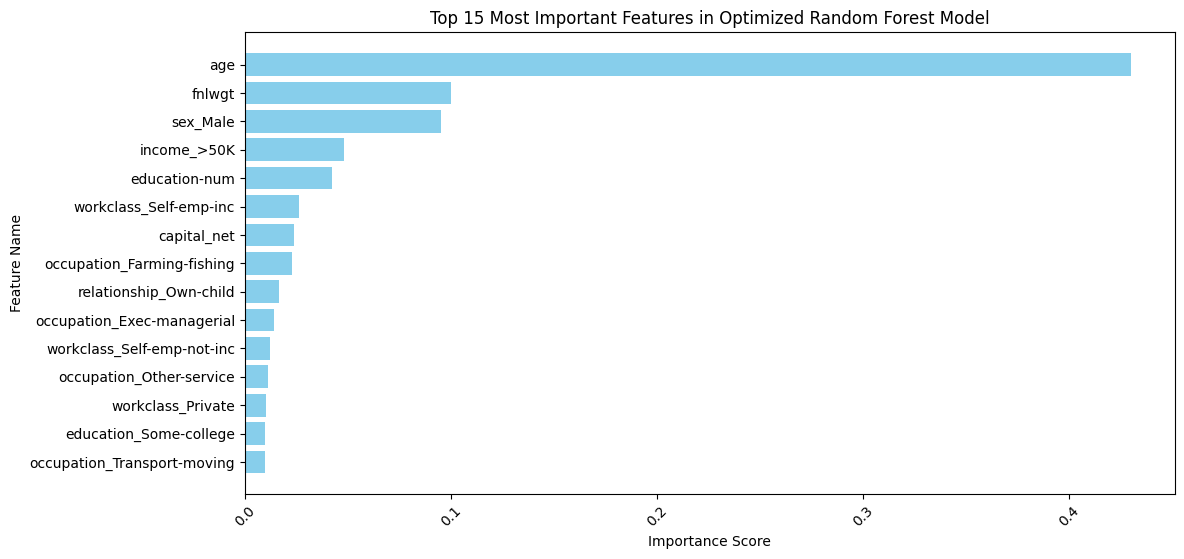

In [61]:

top_features = feature_importance_df.head(15)

plt.figure(figsize=(12, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Feature Name')
plt.title('Top 15 Most Important Features in Optimized Random Forest Model')
plt.gca().invert_yaxis()  
plt.xticks(rotation=45)  
plt.show()


#### Am ales sa las doar 15 dintre cele mai importante features deoarece codul a rulat oricum destul de greu asa ca am lasat doar 15, pentru a avea o imagine mai clara si a nu fi nici prea aglomerat graficul
#### Conform acestui grafic, VARSTA e un factor principal in setul nostru de date, deoarece influenteaza semnificativ numarul de ore lucrate per saptamana, asa cum am observat si in task-ul anterior. Urmeaza variabilele legate de sex, venit si educatie care, de asemenea, asa cum am vazut prin reprezentarile grafice anterioare sunt si ele importante, aducand o importanta ridicata variabilei tinta, adica Hours-per-Week.
#### O explicatie pentru care varsta ar fi cea mai importanta caracteristica a datelor este pentru ca persoanele tinere muncesc probabil la mai multe joburi, avand si joburi extra, pe cand cei mai invarsta, vor lucra mai putin, incercand sa atinga numarul optim de ore al unui job obisnuit. 
#### In plus, cele 3 variabile mentionate anterior, corelate poate cu factori precum cei socio-economici, influenteaza orele lucrate per saptamana. 
#### Un aspect pe care l-am observat si in task 2 a fost ca, pe langa variabilele amintite, si educatia joaca un rol important, influentand intr-o oarecare masura tipul jobului ales dupa terminarea studiilor.

#### Concluzionand, acești factori indică *tendințe actuale în piața muncii*, ceea ce ajută la înțelegerea comportamentului angajaților în funcție de caracteristicile demografice.

### --------------------------------------------------------------------------------------------------

In [ ]:
results_df = pd.DataFrame(results).T

best_rf_model.fit(X_train, y_train)
y_test_pred_optimized_rf = best_rf_model.predict(X_test)
rf_optimized_metrics = evaluate_model(y_test, y_test_pred_optimized_rf)

comparison_df = pd.concat([results_df, pd.DataFrame(rf_optimized_metrics, index=["Optimized Random Forest"])])

print("Final Model Comparison:")
print(comparison_df)

C:\Users\cpop4\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Final Model Comparison:
                                  MAE           MSE          RMSE  \
SGDRegressor             2.125785e+18  5.979771e+36  2.445357e+18   
DecisionTreeRegressor    1.020969e+01  2.307538e+02  1.519058e+01   
RandomForestRegressor    7.576853e+00  1.210728e+02  1.100331e+01   
RidgeRegression          7.622375e+00  1.209465e+02  1.099757e+01   
LassoRegression          7.526347e+00  1.438202e+02  1.199251e+01   
Optimized Random Forest  7.185012e+00  1.124643e+02  1.060492e+01   

                                   R2  
SGDRegressor            -3.927091e+34  
DecisionTreeRegressor   -5.154278e-01  
RandomForestRegressor    2.048797e-01  
RidgeRegression          2.057088e-01  
LassoRegression          5.549036e-02  
Optimized Random Forest  2.614140e-01  


### Asa cum am mentionat si anterior, tuning - Random Forest este un model bun pentru datele noastre, ceea ce se poate observa si mai bine din aceste tabele. 
#### Per total, RMSE e cel mai mic, avand predictii mai precise, iar R-patrat mare - explicand variatiile din date cel mai bine. 

#### Alegerea finală: *Tuning Random Forest* → Cu cel mai bun echilibru între precizie și stabilitate.